In [1]:
import pandas as pd

In [2]:
meta_data = pd.read_csv('../../../For_analysis/RNASequencing/IR3/metaDataIR3.csv')
meta_data

,HudAlphaID,QCflagIR3,Specimen Bar Code,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,Specimen Bar Code.1,Quantity (ug),Concentration (ng/ul),...,MEDIAN_3PRIME_BIAS,NUM_UNEXPLAINED_READS,PCT_RIBOSOMAL_BASES,PCT_INTRONIC_BASES,PCT_R2_TRANSCRIPT_STRAND_READS,PCT_MRNA_BASES,MEDIAN_5PRIME_TO_3PRIME_BIAS,PCT_R1_TRANSCRIPT_STRAND_READS,MEDIAN_5PRIME_BIAS,PCT_USABLE_BASES
0,5104-SL-0001,pass,0000373111,3174,Male,PD,V08,0000373111,1.0,115.90,...,0.845235,1093161,0.0,43.4564,98.1025,50.4726,1.191875,1.8975,1.019442,47.9359
1,5104-SL-0002,pass,PP0016-0526,3201,Female,Control,BL,PP0016-0526,1.0,80.07,...,0.913436,569224,0.0,52.9752,98.1428,40.6987,1.058616,1.8572,0.965040,39.6130
2,5104-SL-0003,pass,0003125874,3057,Female,Control,V06,0003125874,1.0,219.70,...,0.902573,485102,0.0,52.2706,95.4321,36.0884,1.095971,4.5679,0.997003,34.8096
3,5104-SL-0004,pass,0003179818,4126,Male,PD,V04,0003179818,1.0,100.06,...,0.856690,1145227,0.0,45.9355,98.3785,48.3407,1.170152,1.6215,1.013765,45.3119
4,5104-SL-0005,pass,0003164601,4117,Female,PD,BL,0003164601,1.0,124.40,...,0.894656,461631,0.0,58.3984,98.0678,35.8255,1.113733,1.9322,0.985280,34.8793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,5104-SL-4890,pass,0003314545,41314,Female,Genetic Cohort,V02,0003314545,1.0,105.10,...,0.707867,1097837,0.0,41.6055,92.5357,40.2167,1.526826,7.4643,1.086717,36.7253
4867,5104-SL-4891,pass,0003376702,42308,Male,Genetic Cohort,V02,0003376702,1.0,56.09,...,0.719713,775420,0.0,47.0490,97.3024,38.8043,1.269003,2.6976,0.946045,35.5802
4868,5104-SL-4892,pass,0003376763,42306,Male,Genetic Cohort,V02,0003376763,1.0,59.68,...,0.736184,794163,0.0,49.0178,97.0378,38.4877,1.300012,2.9622,0.995326,35.4419
4869,5104-SL-4893,pass,0003203630,1010,Unk,HCPOOL,Unk,0003203630,1.0,50.00,...,0.707379,748803,0.0,40.0865,95.8621,44.4177,1.479038,4.1379,1.031890,41.3555


In [3]:
meta_data.columns

Index(['HudAlphaID', 'QCflagIR3', 'Specimen Bar Code', 'PATNO', 'GENDER',
       'DIAGNOSIS', 'CLINICAL_EVENT', 'Specimen Bar Code.1', 'Quantity (ug)',
       'Concentration (ng/ul)', 'Concentration Flag', 'Submitted Volume (ul)',
       'Normalization Volume (30ng/ul)', 'Total Volume (ul)',
       'Input RNASeq (ng)', 'Input miRNA (ng)', '260/280 Ratio',
       '260/230 Ratio', 'RIN Value', 'BOX', 'POSITION', 'Plate', 'Sample',
       'deletion_length', 'insertion_length', 'mismatch_rate',
       'multimapped_percent', 'uniquely_mapped_percent',
       'num_annotated_splices', 'insertion_rate', 'unmapped_other_percent',
       'multimapped', 'num_splices', 'avg_input_read_length',
       'multimapped_toomany', 'total_reads', 'num_GCAG_splices',
       'unmapped_tooshort', 'unmapped_other', 'unmapped_mismatches_percent',
       'num_noncanonical_splices', 'num_ATAC_splices',
       'multimapped_toomany_percent', 'avg_mapped_read_length',
       'unmapped_mismatches', 'deletion_rate', '

In [4]:
meta_data.PATNO.value_counts()

PATNO
1010     53
1009     53
4104      5
3229      5
3214      5
         ..
42349     1
42298     1
42305     1
42431     1
42312     1
Name: count, Length: 1603, dtype: int64

In [5]:
disease_df = meta_data[['PATNO','DIAGNOSIS']].drop_duplicates()

In [6]:
disease_df.DIAGNOSIS.value_counts()

DIAGNOSIS
Genetic Registry    435
PD                  425
Genetic Cohort      418
Control             196
Prodromal            64
SWEDD                63
PDPOOL                1
HCPOOL                1
Name: count, dtype: int64

In [7]:
import os

In [8]:
l = 0
for i in os.listdir('../../../For_analysis/RNASequencing/IR3/quant/'):
    l = l + 1
    print(i)
    if l==3:
        break

PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-4635.longRNA-NEBKAP.salmon.genes.sf
PPMI-Phase2-IR3.3481.BL.0003119333.5104-SL-0197.longRNA-NEBKAP.salmon.genes.sf
PPMI-Phase1-IR3.18567.BL.0000302585.5104-SL-1516.longRNA-NEBKAP.salmon.genes.sf


In [9]:
gene_excel = pd.ExcelFile('/12tb_dsk3/For_analysis/Modified Master DNA Repair List HN NPM.xlsx')

In [10]:
df2 = pd.read_excel(gene_excel, 'smaller')
df1 = pd.read_excel(gene_excel, 'Integrated stress response')

In [11]:
df1

,Genes regulated by ATF4
0,DDIT3
1,ATF3
2,CREBBP
3,HMOX1
4,SCG2
...,...
121,ATF5
122,SERPINC1
123,GRIN2A DRD2
124,SLC7A11


In [12]:
df1 = df1[~df1.iloc[:,0].isna()]

In [13]:
df1

,Genes regulated by ATF4
0,DDIT3
1,ATF3
2,CREBBP
3,HMOX1
4,SCG2
...,...
121,ATF5
122,SERPINC1
123,GRIN2A DRD2
124,SLC7A11


In [14]:
len(df1.iloc[:,0].tolist())

126

In [15]:
df1.iloc[:,0].tolist()

['DDIT3  ',
 'ATF3',
 'CREBBP ',
 'HMOX1 ',
 'SCG2 ',
 'PENK  ',
 'ASNS  ',
 'ATF4 ',
 'ACOT11  ',
 'TNF ',
 'ERBB2  ',
 'PPP1R15A  ',
 'POLR2C ',
 'HSPA5 ',
 'ITIH3 ',
 'VEGFA ',
 'RPS6KA3  ',
 'CREB1 ',
 'USF1 ',
 'ATF6  ',
 'BGLAP  ',
 'TRIB3 ',
 'ERVW-1  ',
 'CEBPB  ',
 'PLAT ',
 'TH ',
 'IGFBP1 ',
 'TRPV6  ',
 'EIF2AK2  ',
 'PSEN1 ',
 'S100A8  ',
 'ATF2 ',
 'CSF1R  ',
 'ELANE  ',
 'THEG ',
 'CEBPA  ',
 'CEBPE  ',
 'INS ',
 'KAT2B  ',
 'NRP1 ',
 'PTH ',
 'SQSTM1  ',
 'SLC38A2  ',
 'CCND1  ',
 'LHX2  ',
 'LITAF  ',
 'S100P ',
 'PMAIP1  ',
 'DDIT4 ',
 'MTOR  ',
 'CA9  ',
 'IL1B ',
 'PDGFRA',
 'VIM',
 ' SP7 ',
 'IHH ',
 'NUPR1 ',
 'CASP12 ',
 'NFE2L2 FGF2',
 ' RUNX2 ',
 ' MAP1LC3B ',
 ' DDR2 ',
 'TNFRSF11A  ',
 'HLA-DRB1 ',
 'PRKN ',
 'BBC3 ',
 'PTGS2 ',
 'DKK1 ',
 'CHAC1',
 'PER2 ',
 'DNAJB9 ',
 'APOE ',
 'MCL1',
 'FGF21 ',
 'SIRT1',
 'TNC ',
 'SLC6A4 ',
 'F7 ',
 'INHBE ',
 'KDM6B ',
 'PPARGC1A ',
 'GNB1L ',
 'HRK ',
 'FGF19 ',
 'EDN1 ',
 'CTNNB1 ',
 'SIRT4 ',
 'IL6 ',
 'CYP2E1 ',
 '

In [16]:
gene_list = [i.strip() for i in df1.iloc[:,0].tolist()]

In [17]:
len(set(gene_list))

126

In [18]:
len(gene_list)

126

In [19]:

from pybiomart import Server

# Connect to the Ensembl server
server = Server(host='http://www.ensembl.org')
dataset = server.marts['ENSEMBL_MART_ENSEMBL'].datasets['hsapiens_gene_ensembl']  # Replace with your organism

# Query for gene names and Ensembl IDs
# Replace 'BRCA1' with your gene of interest or a list of genes
genes_of_interest = gene_list
query_results = dataset.query(attributes=['external_gene_name', 'ensembl_gene_id'])

# Filter results for your genes of interest
results = query_results[query_results['Gene name'].isin(genes_of_interest)]
print(results)


      Gene name   Gene stable ID
2516      CARS2  ENSG00000134905
2842     PMAIP1  ENSG00000141682
3654      NARS1  ENSG00000134440
3865    TNFSF11  ENSG00000120659
4634       NRP1  ENSG00000099250
...         ...              ...
80084    S100A8  ENSG00000143546
83034     CDC42  ENSG00000070831
83265      ATF3  ENSG00000162772
83278     DISC1  ENSG00000162946
83486      MTOR  ENSG00000198793

[145 rows x 2 columns]


In [20]:
 set(gene_list) - set(results['Gene name'])

{'GRIN2A DRD2', 'NFE2L2 FGF2', 'THEG'}

In [21]:
keep_genes = results['Gene stable ID'].tolist()
keep_genes.append('ENSG00000183454')
keep_genes.append('ENSG00000149295')
keep_genes.append('ENSG00000116044')
keep_genes.append('ENSG00000138685')
keep_genes.append('ENSG00000105549')

In [22]:
len (set(keep_genes))

150

In [23]:
sample_3813 = pd.read_csv('../../../For_analysis/RNASequencing/IR3/quant/PPMI-Phase2-IR3.3813.V02.PP0013-6148.5104-SL-4635.longRNA-NEBKAP.salmon.genes.sf' ,sep = '\t')
m = [i.split('.')[0] for i in sample_3813.Name.tolist()]

In [24]:
keep_genes = list(set(m).intersection(keep_genes))

In [25]:
len(keep_genes) # found 3 genes

128

In [26]:
l = 0
from tqdm import tqdm
data = pd.DataFrame(columns=keep_genes)
for i in tqdm(os.listdir('../../../For_analysis/RNASequencing/IR3/quant/')):
    if 'genes' not in i:
        continue
    
    read_file_path = '../../../For_analysis/RNASequencing/IR3/quant/'+ str(i)
    df = pd.read_csv(read_file_path ,sep = '\t')
    #print(df.head())
    m = [i.split('.')[0] for i in df.Name.tolist()]
    df['Name'] = m 
    df = df.rename(columns={'TPM': i})
    #print(df.head())
    df = df.set_index('Name')[[i]].T
    
    df = df[keep_genes]
    #print(df.head())
    data = pd.concat([data,df])


  0%|                                                                                                                                         | 0/9513 [00:00<?, ?it/s]/tmp/ipykernel_170393/3419326005.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data,df])
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9513/9513 [05:43<00:00, 27.66it/s]


In [27]:
data.sort_index()

,ENSG00000124608,ENSG00000147955,ENSG00000150782,ENSG00000128965,ENSG00000182578,ENSG00000137513,ENSG00000162267,ENSG00000070831,ENSG00000134905,ENSG00000116874,...,ENSG00000105550,ENSG00000141655,ENSG00000162772,ENSG00000242950,ENSG00000057593,ENSG00000143384,ENSG00000096717,ENSG00000158773,ENSG00000092067,ENSG00000078081
PPMI-Phase1-IR3.1009.POOL.0003202425.5104-SL-0095.longRNA-NEBKAP.salmon.genes.sf,2.638310,6.57359,5.53901,0.079374,25.06850,6.60505,0.392918,141.9530,66.8601,4.42577,...,0.022832,1.272940,0.763086,8.89296,0.103687,422.766,16.13960,51.2767,1.461490,0.840464
PPMI-Phase1-IR3.1009.POOL.0003202427.5104-SL-0287.longRNA-NEBKAP.salmon.genes.sf,1.341730,3.49286,3.07238,0.027241,6.36487,5.09294,0.199863,89.4987,33.5744,2.96341,...,0.036896,0.775609,0.217833,5.48420,0.084819,318.869,9.68273,40.2642,0.823454,0.474636
PPMI-Phase1-IR3.1009.POOL.0003202429.5104-SL-0479.longRNA-NEBKAP.salmon.genes.sf,1.738460,4.60251,3.94346,0.059772,9.51843,7.50198,0.401952,124.4760,45.3437,3.07158,...,0.026375,0.791855,0.568036,7.04768,0.152506,400.704,13.38720,49.3177,1.497200,0.698571
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-0671.longRNA-NEBKAP.salmon.genes.sf,1.593500,4.40333,2.91032,0.059084,8.76744,6.96795,0.260024,114.6420,42.4416,2.44187,...,0.044385,0.311996,0.409993,6.73323,0.220270,385.308,12.81560,45.9276,1.334710,0.792600
PPMI-Phase1-IR3.1009.POOL.0003202432.5104-SL-0767.longRNA-NEBKAP.salmon.genes.sf,1.680140,5.12292,3.74529,0.107142,8.08826,7.01195,0.143995,123.0990,41.5901,4.13099,...,0.048668,0.383733,0.582089,7.13385,0.176304,407.029,14.61460,43.0722,1.375650,0.793438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-2827.longRNA-NEBKAP.salmon.genes.sf,0.890822,3.65051,4.43952,0.025609,6.46628,4.27345,0.000000,121.3950,41.0326,1.32261,...,0.000000,0.170223,0.232489,3.36571,0.064131,324.001,10.77720,48.9254,2.193320,0.429777
PPMI-Phase2-IR3.92490.V04.0001176681.5104-SL-2875.longRNA-NEBKAP.salmon.genes.sf,1.312660,4.23525,4.30760,0.020386,22.35090,4.53880,0.018298,106.9010,53.2124,1.94299,...,0.000000,0.293935,0.556878,6.44862,0.040896,348.627,9.51572,52.8129,2.679020,0.773367
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-2868.longRNA-NEBKAP.salmon.genes.sf,1.424320,4.38962,4.79265,0.028160,18.78140,4.72877,0.009354,122.5620,51.7932,2.96330,...,0.000000,0.466868,0.340860,6.35559,0.081911,385.706,10.15390,59.8333,3.104140,0.651439
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-4064.longRNA-NEBKAP.salmon.genes.sf,0.822055,3.35555,8.67129,0.054970,4.06912,3.78405,0.018757,140.2780,32.9438,1.67404,...,0.000000,0.280740,0.197860,4.44099,0.000000,364.773,8.57479,40.6304,3.061610,0.409384


In [28]:
meta_data

,HudAlphaID,QCflagIR3,Specimen Bar Code,PATNO,GENDER,DIAGNOSIS,CLINICAL_EVENT,Specimen Bar Code.1,Quantity (ug),Concentration (ng/ul),...,MEDIAN_3PRIME_BIAS,NUM_UNEXPLAINED_READS,PCT_RIBOSOMAL_BASES,PCT_INTRONIC_BASES,PCT_R2_TRANSCRIPT_STRAND_READS,PCT_MRNA_BASES,MEDIAN_5PRIME_TO_3PRIME_BIAS,PCT_R1_TRANSCRIPT_STRAND_READS,MEDIAN_5PRIME_BIAS,PCT_USABLE_BASES
0,5104-SL-0001,pass,0000373111,3174,Male,PD,V08,0000373111,1.0,115.90,...,0.845235,1093161,0.0,43.4564,98.1025,50.4726,1.191875,1.8975,1.019442,47.9359
1,5104-SL-0002,pass,PP0016-0526,3201,Female,Control,BL,PP0016-0526,1.0,80.07,...,0.913436,569224,0.0,52.9752,98.1428,40.6987,1.058616,1.8572,0.965040,39.6130
2,5104-SL-0003,pass,0003125874,3057,Female,Control,V06,0003125874,1.0,219.70,...,0.902573,485102,0.0,52.2706,95.4321,36.0884,1.095971,4.5679,0.997003,34.8096
3,5104-SL-0004,pass,0003179818,4126,Male,PD,V04,0003179818,1.0,100.06,...,0.856690,1145227,0.0,45.9355,98.3785,48.3407,1.170152,1.6215,1.013765,45.3119
4,5104-SL-0005,pass,0003164601,4117,Female,PD,BL,0003164601,1.0,124.40,...,0.894656,461631,0.0,58.3984,98.0678,35.8255,1.113733,1.9322,0.985280,34.8793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4866,5104-SL-4890,pass,0003314545,41314,Female,Genetic Cohort,V02,0003314545,1.0,105.10,...,0.707867,1097837,0.0,41.6055,92.5357,40.2167,1.526826,7.4643,1.086717,36.7253
4867,5104-SL-4891,pass,0003376702,42308,Male,Genetic Cohort,V02,0003376702,1.0,56.09,...,0.719713,775420,0.0,47.0490,97.3024,38.8043,1.269003,2.6976,0.946045,35.5802
4868,5104-SL-4892,pass,0003376763,42306,Male,Genetic Cohort,V02,0003376763,1.0,59.68,...,0.736184,794163,0.0,49.0178,97.0378,38.4877,1.300012,2.9622,0.995326,35.4419
4869,5104-SL-4893,pass,0003203630,1010,Unk,HCPOOL,Unk,0003203630,1.0,50.00,...,0.707379,748803,0.0,40.0865,95.8621,44.4177,1.479038,4.1379,1.031890,41.3555


In [29]:
l

0

In [30]:
l = data.index.tolist()
patient_no = [i.split('.')[1] for i in l]
time_point = [i.split('.')[2] for i in l]

In [31]:
data['Patient_Name'] = patient_no 
data['Time_Point'] = time_point

In [32]:
col_index= ['Patient_Name',
 'Time_Point']+ data.columns.tolist()[0:-2]

In [33]:
data = data[col_index]

In [34]:
data = data.sort_values(by = 'Patient_Name', axis = 0)

In [35]:
data

,Patient_Name,Time_Point,ENSG00000124608,ENSG00000147955,ENSG00000150782,ENSG00000128965,ENSG00000182578,ENSG00000137513,ENSG00000162267,ENSG00000070831,...,ENSG00000105550,ENSG00000141655,ENSG00000162772,ENSG00000242950,ENSG00000057593,ENSG00000143384,ENSG00000096717,ENSG00000158773,ENSG00000092067,ENSG00000078081
PPMI-Phase1-IR3.1009.POOL.0003202438.5104-SL-1343.longRNA-NEBKAP.salmon.genes.sf,1009,POOL,1.633260,4.34242,3.35039,0.053386,9.28049,7.006850,0.174387,113.6990,...,0.045709,0.960029,0.323672,6.411670,0.141806,381.546,13.04580,43.5545,1.480540,0.749512
PPMI-Phase1-IR3.1009.POOL.0003202431.5104-SL-0671.longRNA-NEBKAP.salmon.genes.sf,1009,POOL,1.593500,4.40333,2.91032,0.059084,8.76744,6.967950,0.260024,114.6420,...,0.044385,0.311996,0.409993,6.733230,0.220270,385.308,12.81560,45.9276,1.334710,0.792600
PPMI-Phase2-IR3.1009.POOL.0003203727.5104-SL-4014.longRNA-NEBKAP.salmon.genes.sf,1009,POOL,1.938550,5.39471,3.96727,0.163926,11.25900,7.973000,0.307793,108.9360,...,0.061715,0.466594,0.440764,8.607860,0.191831,384.462,15.06460,51.3359,1.547770,0.809663
PPMI-Phase2-IR3.1009.POOL.0003202434.5104-SL-0959.longRNA-NEBKAP.salmon.genes.sf,1009,POOL,0.756690,1.94451,1.55386,0.033135,3.70466,3.063470,0.138837,52.6615,...,0.066534,0.495938,0.195979,3.769090,0.084181,168.702,6.24969,20.8746,0.618203,0.319321
PPMI-Phase1-IR3.1009.POOL.0003202442.5104-SL-1719.longRNA-NEBKAP.salmon.genes.sf,1009,POOL,1.674680,5.23379,3.33058,0.053125,9.10486,6.729010,0.271649,116.8890,...,0.045894,0.912125,0.327388,8.102680,0.216247,396.555,14.20470,46.3731,1.586830,0.840414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPMI-Phase2-IR3.92490.V06.0003173298.5104-SL-2868.longRNA-NEBKAP.salmon.genes.sf,92490,V06,1.424320,4.38962,4.79265,0.028160,18.78140,4.728770,0.009354,122.5620,...,0.000000,0.466868,0.340860,6.355590,0.081911,385.706,10.15390,59.8333,3.104140,0.651439
PPMI-Phase2-IR3.92490.V02.0000377639.5104-SL-2827.longRNA-NEBKAP.salmon.genes.sf,92490,V02,0.890822,3.65051,4.43952,0.025609,6.46628,4.273450,0.000000,121.3950,...,0.000000,0.170223,0.232489,3.365710,0.064131,324.001,10.77720,48.9254,2.193320,0.429777
PPMI-Phase1-IR3.92834.BL.0000286784.5104-SL-0950.longRNA-NEBKAP.salmon.genes.sf,92834,BL,0.352857,2.05421,2.83097,0.030253,1.47499,0.971206,0.000000,49.2319,...,0.000000,0.135626,0.136928,0.999122,0.000000,122.024,3.06188,17.3233,1.703500,0.098863
PPMI-Phase2-IR3.92834.V02.0001093148.5104-SL-4064.longRNA-NEBKAP.salmon.genes.sf,92834,V02,0.822055,3.35555,8.67129,0.054970,4.06912,3.784050,0.018757,140.2780,...,0.000000,0.280740,0.197860,4.440990,0.000000,364.773,8.57479,40.6304,3.061610,0.409384


In [36]:
len(set(data.Patient_Name))

1589

In [37]:
len(set(meta_data.PATNO))

1603

In [38]:
len(set(data.Patient_Name) - set(meta_data.PATNO.astype(str)))

10

In [39]:
temp_meta = meta_data[['PATNO','DIAGNOSIS']].drop_duplicates()

In [40]:
temp_meta.PATNO = temp_meta.PATNO.astype(str)

In [41]:
data = pd.merge(data,temp_meta, left_on = 'Patient_Name', right_on = 'PATNO')

In [42]:
keep_columns = ['DIAGNOSIS'] + data.columns.tolist()[0:-2]

In [43]:
data = data[keep_columns]

In [44]:
data

,DIAGNOSIS,Patient_Name,Time_Point,ENSG00000124608,ENSG00000147955,ENSG00000150782,ENSG00000128965,ENSG00000182578,ENSG00000137513,ENSG00000162267,...,ENSG00000105550,ENSG00000141655,ENSG00000162772,ENSG00000242950,ENSG00000057593,ENSG00000143384,ENSG00000096717,ENSG00000158773,ENSG00000092067,ENSG00000078081
0,PDPOOL,1009,POOL,1.633260,4.34242,3.35039,0.053386,9.28049,7.006850,0.174387,...,0.045709,0.960029,0.323672,6.411670,0.141806,381.546,13.04580,43.5545,1.480540,0.749512
1,PDPOOL,1009,POOL,1.593500,4.40333,2.91032,0.059084,8.76744,6.967950,0.260024,...,0.044385,0.311996,0.409993,6.733230,0.220270,385.308,12.81560,45.9276,1.334710,0.792600
2,PDPOOL,1009,POOL,1.938550,5.39471,3.96727,0.163926,11.25900,7.973000,0.307793,...,0.061715,0.466594,0.440764,8.607860,0.191831,384.462,15.06460,51.3359,1.547770,0.809663
3,PDPOOL,1009,POOL,0.756690,1.94451,1.55386,0.033135,3.70466,3.063470,0.138837,...,0.066534,0.495938,0.195979,3.769090,0.084181,168.702,6.24969,20.8746,0.618203,0.319321
4,PDPOOL,1009,POOL,1.674680,5.23379,3.33058,0.053125,9.10486,6.729010,0.271649,...,0.045894,0.912125,0.327388,8.102680,0.216247,396.555,14.20470,46.3731,1.586830,0.840414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,Prodromal,92490,V06,1.424320,4.38962,4.79265,0.028160,18.78140,4.728770,0.009354,...,0.000000,0.466868,0.340860,6.355590,0.081911,385.706,10.15390,59.8333,3.104140,0.651439
4740,Prodromal,92490,V02,0.890822,3.65051,4.43952,0.025609,6.46628,4.273450,0.000000,...,0.000000,0.170223,0.232489,3.365710,0.064131,324.001,10.77720,48.9254,2.193320,0.429777
4741,Prodromal,92834,BL,0.352857,2.05421,2.83097,0.030253,1.47499,0.971206,0.000000,...,0.000000,0.135626,0.136928,0.999122,0.000000,122.024,3.06188,17.3233,1.703500,0.098863
4742,Prodromal,92834,V02,0.822055,3.35555,8.67129,0.054970,4.06912,3.784050,0.018757,...,0.000000,0.280740,0.197860,4.440990,0.000000,364.773,8.57479,40.6304,3.061610,0.409384


In [45]:
data = data[data.DIAGNOSIS.isin(['PD','Control','Prodromal'])]

In [46]:
data

,DIAGNOSIS,Patient_Name,Time_Point,ENSG00000124608,ENSG00000147955,ENSG00000150782,ENSG00000128965,ENSG00000182578,ENSG00000137513,ENSG00000162267,...,ENSG00000105550,ENSG00000141655,ENSG00000162772,ENSG00000242950,ENSG00000057593,ENSG00000143384,ENSG00000096717,ENSG00000158773,ENSG00000092067,ENSG00000078081
106,Prodromal,10874,V06,1.623740,5.71636,3.23423,0.081154,9.22850,8.470420,0.000000,...,0.000000,1.226020,0.438107,6.829330,0.034924,377.132,14.80720,47.5745,0.769366,0.696594
107,Prodromal,10874,BL,1.970300,7.09042,5.09551,0.106910,9.49453,7.945420,0.702485,...,0.076051,0.755516,0.635478,6.510090,0.276031,447.540,12.95820,68.4735,1.272860,0.660564
108,Prodromal,10874,V04,2.473780,6.56695,4.36327,0.126984,16.41260,9.100120,0.023441,...,0.000000,1.159040,0.727889,8.392840,0.034762,429.094,15.73480,51.8785,0.925800,1.009410
109,Prodromal,10874,V02,2.602640,8.13634,4.87294,0.035956,11.83120,8.772940,0.770037,...,0.228117,1.425360,0.511457,15.184200,0.452929,401.662,14.11390,47.8050,1.115720,1.048270
110,Prodromal,12224,V08,2.146230,7.03757,5.26220,0.060479,7.78888,10.031300,0.474753,...,0.051034,0.968506,0.515686,14.566100,0.339623,395.306,17.76850,49.0721,4.559930,0.901913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,Prodromal,92490,V06,1.424320,4.38962,4.79265,0.028160,18.78140,4.728770,0.009354,...,0.000000,0.466868,0.340860,6.355590,0.081911,385.706,10.15390,59.8333,3.104140,0.651439
4740,Prodromal,92490,V02,0.890822,3.65051,4.43952,0.025609,6.46628,4.273450,0.000000,...,0.000000,0.170223,0.232489,3.365710,0.064131,324.001,10.77720,48.9254,2.193320,0.429777
4741,Prodromal,92834,BL,0.352857,2.05421,2.83097,0.030253,1.47499,0.971206,0.000000,...,0.000000,0.135626,0.136928,0.999122,0.000000,122.024,3.06188,17.3233,1.703500,0.098863
4742,Prodromal,92834,V02,0.822055,3.35555,8.67129,0.054970,4.06912,3.784050,0.018757,...,0.000000,0.280740,0.197860,4.440990,0.000000,364.773,8.57479,40.6304,3.061610,0.409384


In [47]:
data.to_csv('/12tb_dsk3/For_analysis/count_matrix_per_gene_list/integrated_stress_response_expression.csv', index=False)

In [48]:
data.columns

Index(['DIAGNOSIS', 'Patient_Name', 'Time_Point', 'ENSG00000124608',
       'ENSG00000147955', 'ENSG00000150782', 'ENSG00000128965',
       'ENSG00000182578', 'ENSG00000137513', 'ENSG00000162267',
       ...
       'ENSG00000105550', 'ENSG00000141655', 'ENSG00000162772',
       'ENSG00000242950', 'ENSG00000057593', 'ENSG00000143384',
       'ENSG00000096717', 'ENSG00000158773', 'ENSG00000092067',
       'ENSG00000078081'],
      dtype='object', length=131)

In [49]:
# comapring control vs all time

In [50]:
data.DIAGNOSIS.value_counts()

DIAGNOSIS
PD           1716
Control       869
Prodromal     254
Name: count, dtype: int64

In [51]:
Control_sample = data[data.DIAGNOSIS == 'Control']

In [52]:
Control_sample.Time_Point.value_counts()

Time_Point
BL     189
V04    179
V02    177
V06    165
V08    159
Name: count, dtype: int64

In [53]:
PD_sample = data[data.DIAGNOSIS == 'PD']
PD_sample.Time_Point.value_counts()

Time_Point
BL     393
V04    354
V06    352
V08    340
V02    277
Name: count, dtype: int64

In [54]:
Prodromal_sample = data[data.DIAGNOSIS == 'Prodromal']
Prodromal_sample.Time_Point.value_counts()

Time_Point
V04    59
V02    59
V06    58
BL     58
V08    20
Name: count, dtype: int64

In [55]:
Control_sample = Control_sample.reset_index(drop=True)
Control_sample 

,DIAGNOSIS,Patient_Name,Time_Point,ENSG00000124608,ENSG00000147955,ENSG00000150782,ENSG00000128965,ENSG00000182578,ENSG00000137513,ENSG00000162267,...,ENSG00000105550,ENSG00000141655,ENSG00000162772,ENSG00000242950,ENSG00000057593,ENSG00000143384,ENSG00000096717,ENSG00000158773,ENSG00000092067,ENSG00000078081
0,Control,3000,V02,1.781130,4.97222,2.21766,0.009591,6.04763,7.37523,0.000000,...,0.000000,0.170906,0.161457,3.93776,0.030899,389.756,14.02940,49.6230,2.28679,0.352309
1,Control,3000,V06,2.019010,6.37102,4.13360,0.008235,6.65328,8.26723,0.008348,...,0.000000,0.195687,0.433464,4.48119,0.016552,351.006,15.39030,48.0223,2.06406,0.911066
2,Control,3000,V04,1.990740,6.34013,4.26839,0.232161,7.68839,8.60849,1.976110,...,0.055111,2.432820,0.635370,13.55930,0.912555,419.601,15.57450,51.9112,3.24137,1.024880
3,Control,3000,V08,1.949080,6.11111,3.74083,0.029833,6.44000,7.48428,0.044657,...,0.000000,0.639087,0.176861,6.49922,0.018817,451.637,14.91360,56.6664,2.04539,0.696259
4,Control,3000,BL,2.501520,7.49070,3.86083,0.046374,10.47050,8.18364,0.379377,...,0.099257,1.316970,0.321350,10.84510,0.606121,427.034,15.34920,65.9074,4.60541,1.133910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,Control,4118,BL,2.352450,4.99664,4.53798,0.016576,24.34130,5.69722,0.133997,...,0.000000,0.801501,0.518388,7.09614,0.115517,336.863,13.10750,45.5033,1.03791,0.866997
865,Control,4118,V02,2.856090,7.01449,6.44444,0.053249,23.30850,9.47109,0.121576,...,0.000000,0.875072,0.699758,10.85950,0.015482,504.173,19.67220,76.2301,1.65865,1.053310
866,Control,4139,BL,1.387280,5.80561,4.96433,0.024531,8.01193,4.74243,0.102628,...,0.038191,0.881321,0.344810,3.95736,0.255078,413.772,11.34260,58.6439,1.76262,0.384207
867,Control,4139,V04,3.147090,8.91439,2.76457,0.121861,40.15610,5.23763,0.454249,...,0.031971,1.273800,0.702197,7.32761,0.132107,304.489,11.13440,51.7307,1.27197,0.839346


In [56]:
Prodromal_sample = Prodromal_sample.reset_index(drop=True)
Prodromal_sample

,DIAGNOSIS,Patient_Name,Time_Point,ENSG00000124608,ENSG00000147955,ENSG00000150782,ENSG00000128965,ENSG00000182578,ENSG00000137513,ENSG00000162267,...,ENSG00000105550,ENSG00000141655,ENSG00000162772,ENSG00000242950,ENSG00000057593,ENSG00000143384,ENSG00000096717,ENSG00000158773,ENSG00000092067,ENSG00000078081
0,Prodromal,10874,V06,1.623740,5.71636,3.23423,0.081154,9.22850,8.470420,0.000000,...,0.000000,1.226020,0.438107,6.829330,0.034924,377.132,14.80720,47.5745,0.769366,0.696594
1,Prodromal,10874,BL,1.970300,7.09042,5.09551,0.106910,9.49453,7.945420,0.702485,...,0.076051,0.755516,0.635478,6.510090,0.276031,447.540,12.95820,68.4735,1.272860,0.660564
2,Prodromal,10874,V04,2.473780,6.56695,4.36327,0.126984,16.41260,9.100120,0.023441,...,0.000000,1.159040,0.727889,8.392840,0.034762,429.094,15.73480,51.8785,0.925800,1.009410
3,Prodromal,10874,V02,2.602640,8.13634,4.87294,0.035956,11.83120,8.772940,0.770037,...,0.228117,1.425360,0.511457,15.184200,0.452929,401.662,14.11390,47.8050,1.115720,1.048270
4,Prodromal,12224,V08,2.146230,7.03757,5.26220,0.060479,7.78888,10.031300,0.474753,...,0.051034,0.968506,0.515686,14.566100,0.339623,395.306,17.76850,49.0721,4.559930,0.901913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Prodromal,92490,V06,1.424320,4.38962,4.79265,0.028160,18.78140,4.728770,0.009354,...,0.000000,0.466868,0.340860,6.355590,0.081911,385.706,10.15390,59.8333,3.104140,0.651439
250,Prodromal,92490,V02,0.890822,3.65051,4.43952,0.025609,6.46628,4.273450,0.000000,...,0.000000,0.170223,0.232489,3.365710,0.064131,324.001,10.77720,48.9254,2.193320,0.429777
251,Prodromal,92834,BL,0.352857,2.05421,2.83097,0.030253,1.47499,0.971206,0.000000,...,0.000000,0.135626,0.136928,0.999122,0.000000,122.024,3.06188,17.3233,1.703500,0.098863
252,Prodromal,92834,V02,0.822055,3.35555,8.67129,0.054970,4.06912,3.784050,0.018757,...,0.000000,0.280740,0.197860,4.440990,0.000000,364.773,8.57479,40.6304,3.061610,0.409384


In [57]:
PD_sample = PD_sample.reset_index(drop=True)
PD_sample 

,DIAGNOSIS,Patient_Name,Time_Point,ENSG00000124608,ENSG00000147955,ENSG00000150782,ENSG00000128965,ENSG00000182578,ENSG00000137513,ENSG00000162267,...,ENSG00000105550,ENSG00000141655,ENSG00000162772,ENSG00000242950,ENSG00000057593,ENSG00000143384,ENSG00000096717,ENSG00000158773,ENSG00000092067,ENSG00000078081
0,PD,3001,BL,0.991900,2.91518,2.08871,0.000000,3.19843,4.20867,0.000000,...,0.000000,0.358237,0.157277,2.31980,0.022579,222.748,8.63684,29.8310,0.574564,0.232999
1,PD,3001,V02,2.349160,6.37486,4.88307,0.000000,8.41380,10.00850,0.146492,...,0.000000,0.747093,0.280844,6.08057,0.023279,401.633,20.99010,52.1215,0.893566,0.656469
2,PD,3001,V06,1.416090,3.42004,2.90255,0.154679,5.35717,5.20619,0.753016,...,0.053416,1.356150,0.510818,8.78308,0.506752,287.425,11.52980,32.7746,0.764537,1.012670
3,PD,3001,V08,0.744442,2.63346,2.07631,0.029640,3.94906,3.44041,0.102659,...,0.000000,0.430895,0.125010,3.04318,0.100106,243.121,8.46531,26.6222,0.489812,0.450182
4,PD,3001,V04,2.050700,5.74118,4.08691,0.034056,5.70151,7.38199,0.096429,...,0.024106,0.540140,0.316542,5.33194,0.121630,385.968,17.64690,50.5315,0.845901,0.780902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1711,PD,4135,V04,0.646987,1.65086,1.99869,0.014273,3.38102,2.68690,0.005502,...,0.000000,0.679615,0.224888,1.36579,0.008709,234.038,10.56430,24.9634,1.651420,0.277414
1712,PD,4135,V02,2.033620,5.59852,3.74679,0.000000,13.67070,8.27896,0.189568,...,0.082931,1.611990,0.506259,10.68830,0.253973,589.602,17.96570,75.8776,4.562860,1.302680
1713,PD,4136,V06,1.700850,6.19263,3.32687,0.000000,8.17341,6.26156,0.111474,...,0.000000,0.765746,0.457151,4.87691,0.000000,415.492,15.93680,63.6202,0.927899,0.546434
1714,PD,4136,BL,2.755820,7.86583,2.77764,0.031383,17.84970,6.19644,1.194080,...,0.133338,1.284290,0.741762,9.59386,0.421836,330.648,13.03770,54.3171,0.637961,1.212290


In [58]:
elements = list(set(data.Time_Point))

In [59]:
import itertools

# Define the list


# Generate all combinations of 2 including reverse pairs
combinations_with_reverse = list(itertools.product(elements, repeat=2))

# Print the result
for combo in combinations_with_reverse:
    print(combo)


('V06', 'V06')
('V06', 'BL')
('V06', 'V02')
('V06', 'V08')
('V06', 'V04')
('BL', 'V06')
('BL', 'BL')
('BL', 'V02')
('BL', 'V08')
('BL', 'V04')
('V02', 'V06')
('V02', 'BL')
('V02', 'V02')
('V02', 'V08')
('V02', 'V04')
('V08', 'V06')
('V08', 'BL')
('V08', 'V02')
('V08', 'V08')
('V08', 'V04')
('V04', 'V06')
('V04', 'BL')
('V04', 'V02')
('V04', 'V08')
('V04', 'V04')


# A. all combination Control vs PRODROMAL

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random
import random
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import random
from itertools import product  # assuming combinations_with_reverse is some kind of product

ACCURACY_DICT = dict()
MAX_SAMPLES = dict()
FEATURE_IMPORTANCES = dict()

F1_SCORES = dict()
PRECISION_SCORES = dict()
RECALL_SCORES = dict()
AUC_SCORES = dict()

for combo in tqdm(combinations_with_reverse):
    
    Prodromal_sample_ = Prodromal_sample[Prodromal_sample.Time_Point== combo[0]].iloc[:,3:]
    Prodromal_sample_ = Prodromal_sample_.reset_index(drop = True)
    
    Control_sample_ = Control_sample[Control_sample.Time_Point== combo[1]].iloc[:,3:]
    Control_sample_ = Control_sample_.reset_index(drop = True)

    
    accuracies_temp = []
    auc_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    for i in range(1000):
        
        max_num = min(len(Prodromal_sample_),len(Control_sample_))
        
        random_numbers = random.sample(range(0, max_num), max_num)
        
        Prodromal_sample_temp = Prodromal_sample_.iloc[random_numbers,:]
        
        Control_sample_temp = Control_sample_.iloc[random_numbers,:]
        
        X = pd.concat([Prodromal_sample_temp,Control_sample_temp])
        
        y = [0 for i in range(len(Prodromal_sample_temp))] + [1 for i in range(len(Control_sample_temp))]
    
    
    # Stratified train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=42
        )
        
        # Initialize and fit the Logistic Regression model
        model = LogisticRegression(max_iter=150000)
        rfe = RFE(estimator=model,n_features_to_select=128)  # Select top 10 features, adjust as needed
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_test_rfe = rfe.transform(X_test)


        selected_features = X.columns[rfe.support_]
        feature_ranks = rfe.ranking_
        model.fit(X_train_rfe, y_train)
        
        # Predict and evaluate the model
        y_pred = model.predict(X_test_rfe)
        y_prob = model.predict_proba(X_test_rfe)[:, 1]  # probability for the positive class
        
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracies_temp.append(accuracy)
        auc_scores.append(auc)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        # Store feature names and scores for the first iteration only, to avoid redundancy
        
        coefficients = model.coef_.flatten()
        feature_coefficients = dict(zip(selected_features, coefficients))
        FEATURE_IMPORTANCES[f'Prodromal_{combo[0]}_Control_{combo[1]}_{i}'] = feature_coefficients
        
        

    ACCURACY_DICT[f'Prodromal_{combo[0]}_control_{combo[1]}'] = np.mean(accuracies_temp)
    MAX_SAMPLES[f'Prodromal_{combo[0]}_control_{combo[1]}'] = max_num

    PRECISION_SCORES[f'Prodromal_{combo[0]}_control_{combo[1]}'] =  np.mean(precision_scores)
    RECALL_SCORES[f'Prodromal_{combo[0]}_control_{combo[1]}']=  np.mean(recall_scores)
    AUC_SCORES[f'Prodromal_{combo[0]}_control_{combo[1]}'] =  np.mean(auc_scores)
    
    # Storing additional metrics
    print(f"Metrics for Prodromal_{combo[0]}_control_{combo[1]}:")
    print(f"Accuracy: {np.mean(accuracies_temp)}")
    print(f"AUC: {np.mean(auc_scores)}")
    print(f"Precision: {np.mean(precision_scores)}")
    print(f"Recall: {np.mean(recall_scores)}")
    print(f"F1 Score: {np.mean(f1_scores)}")


  4%|█████                                                                                                                         | 1/25 [29:46<11:54:42, 1786.79s/it]

Metrics for Prodromal_V06_control_V06:
Accuracy: 0.8582083333333332
AUC: 0.9356319444444444
Precision: 0.8643799505233329
Recall: 0.86225
F1 Score: 0.8583275011456851


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pro = []
Control= []
auc = []
for i,j in tqdm(AUC_SCORES.items()):
    pro.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    auc.append(j)


auc_table_pro_control = pd.DataFrame([pro,Control,auc]).T
auc_table_pro_control  = auc_table_pro_control.rename(columns = {0:'Prodromal', 1:'control', 2: 'Auc'})

auc_table_pro_control['Auc'] = auc_table_pro_control['Auc'].astype(float)
heatmap_data_ = auc_table_pro_control.pivot(index="control", columns="Prodromal", values="Auc")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Auc'})
plt.title("AUC Heatmap for Prodromal vs Control Combinations")

plt.savefig("../heatmaps_plots/auc_heatmaps/integrated_stress_con_vs_pro_auc_heatmap.svg", format='svg')

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pro = []
Control= []
acc = []
for i,j in tqdm(ACCURACY_DICT.items()):
    pro.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    acc.append(j)


accuracy_table_pro_control = pd.DataFrame([pro,Control,acc]).T
accuracy_table_pro_control  = accuracy_table_pro_control .rename(columns = {0:'Prodromal', 1:'control', 2: 'Accuracy'})

accuracy_table_pro_control['Accuracy'] = accuracy_table_pro_control['Accuracy'].astype(float)
heatmap_data_ = accuracy_table_pro_control.pivot(index="control", columns="Prodromal", values="Accuracy")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Accuracy'})
plt.title("Accuracy Heatmap for Prodromal vs Control Combinations")

plt.savefig("../heatmaps_plots/accuracy_heatmaps/integrated_con_vs_pro_accuracy_heatmap.svg", format='svg')

plt.show()

In [ ]:
df_acc = pd.DataFrame(list(ACCURACY_DICT.items()), columns=['Comparison', 'Accuracy'])
df_auc = pd.DataFrame(list(AUC_SCORES.items()), columns=['Comparison', 'AUC'])
#df_f1  = pd.DataFrame(list(F1_SCORES.items()), columns=['Comparison', 'F1'])
df_precision = pd.DataFrame(list(PRECISION_SCORES.items()), columns=['Comparison', 'Precision'])
df_recall = pd.DataFrame(list(RECALL_SCORES.items()), columns=['Comparison', 'Recall'])

import pandas as pd
from functools import reduce

# List of DataFrames to merge
dfs = [df_acc, df_auc, df_precision, df_recall]

# Merge all DataFrames on 'Comparison'
df_all = reduce(lambda left, right: pd.merge(left, right, on='Comparison'), dfs)

df_all.to_csv('../metrics_csv_files/metrics_integrated_stress_con_vs_pro.csv',index = False)

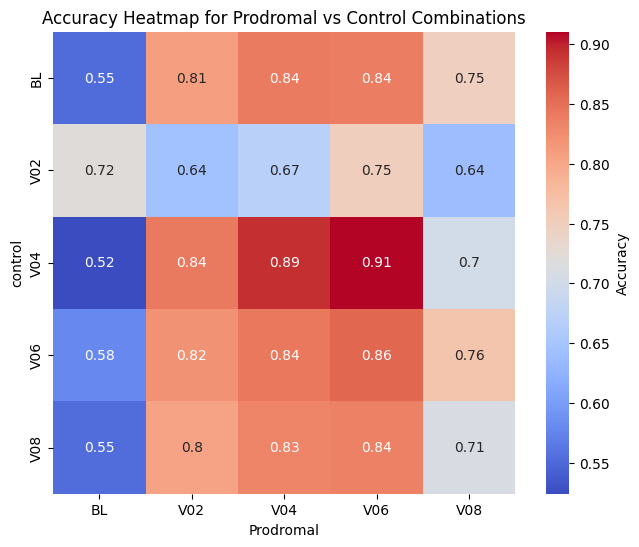

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pro = []
Control= []
acc = []
for i,j in ACCURACY_DICT.items():
    pro.append(i.split('_')[1])
    Control.append(i.split('_')[-1])
    acc.append(j)


accuracy_table_pro_control = pd.DataFrame([pro,Control,acc]).T
accuracy_table_pro_control  = accuracy_table_pro_control .rename(columns = {0:'Prodromal', 1:'control', 2: 'Accuracy'})

accuracy_table_pro_control['Accuracy'] = accuracy_table_pro_control['Accuracy'].astype(float)
heatmap_data_ = accuracy_table_pro_control.pivot(index="control", columns="Prodromal", values="Accuracy")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_, annot=True, cmap="coolwarm", square=True, cbar_kws={'label': 'Accuracy'})
plt.title("Accuracy Heatmap for Prodromal vs Control Combinations")
plt.show()

In [ ]:

FEATURE_IMPORTANCES['Prodromal_V08_Control_V08_0']
sorted_0_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_Control_V08_0'].items(), key=lambda item: item[1]))


In [ ]:
sorted_0_dict_FEATURE_IMPORTANCES_asc

## sorted_1_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_Control_V08'].items(), key=lambda item: item[1]))
sorted_1_dict_FEATURE_IMPORTANCES_asc

In [ ]:
sorted_2_dict_FEATURE_IMPORTANCES_asc = dict(sorted(FEATURE_IMPORTANCES['Prodromal_V08_Control_V08_0'].items(), key=lambda item: item[1]))
sorted_2_dict_FEATURE_IMPORTANCES_asc

In [ ]:
data.DIAGNOSIS.value_counts()

In [ ]:
data['DIAGNOSIS_2'] = data['DIAGNOSIS']

In [ ]:
data['DIAGNOSIS'].replace({'Control': '1.Control', 'Prodromal': '2.Prodromal', 'PD': '3.PD'}, inplace=True)


In [ ]:
data['New_Time_Point'] = data['DIAGNOSIS'] + '_' + data['Time_Point']
data['New_Time_Point_2'] = data['DIAGNOSIS_2'] + '_' + data['Time_Point']

In [ ]:
data = data.sort_values(by = 'New_Time_Point')

In [ ]:
tmp_data = data[data.Time_Point !='V02']

In [ ]:
tmp_data

In [ ]:
df = pd.DataFrame(sorted_2_dict_FEATURE_IMPORTANCES_asc.items())
df[2] = np.abs(df[1])
df = df.sort_values(by = 2, ascending=False)
df

In [ ]:
tmp_data

In [ ]:
tmp_data.New_Time_Point_2.unique()

In [ ]:
genes = df[0].values.tolist()

In [ ]:
control_tmp_data = tmp_data[tmp_data['New_Time_Point_2'].str.startswith('Control')]
control_tmp_data = control_tmp_data.sort_values(by = 'New_Time_Point') 
control_tmp_data

In [ ]:
def return_gene_name(ensembleid):

    try:
        m =  results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
        return m
    except:
        print(ensembleid)
        return ensembleid


In [ ]:
for i in genes:
    if return_gene_name(i) != np.nan:
        print(i, return_gene_name(i))

In [ ]:
import matplotlib.pyplot as plt

# Loop through each gene
for gene in genes:
    # Create a new figure for each gene
    plt.figure(figsize=(12, 8))
    
    # Define a list to store the group data
    groups = ['Control', 'Prodromal', 'PD']
    colors = {'Control': 'blue', 'Prodromal': 'orange', 'PD': 'green'}
    
    for group in groups:
        # Filter and sort data by group
        group_tmp_data = tmp_data[tmp_data['New_Time_Point_2'].str.startswith(group)]
        group_tmp_data = group_tmp_data.sort_values(by='New_Time_Point')
        
        # Calculate mean and standard deviation
        mean_expression = group_tmp_data.groupby('New_Time_Point')[gene].mean()
        std_expression = group_tmp_data.groupby('New_Time_Point')[gene].std()
        
        # Extract clean time points
        index = [i.split('_')[1] for i in mean_expression.index]
        
        # Plot mean expression
        plt.plot(index, mean_expression, color=colors[group], label=f'{group} Mean Expression')
        
        # Fill the standard deviation area
        plt.fill_between(index,
                         mean_expression - std_expression,
                         mean_expression + std_expression,
                         color=colors[group], alpha=0.2, label=f'{group} ± STD')
    
    # Customize plot
    plt.xlabel('Time')
    plt.ylabel('Gene Expression')
    gene  = return_gene_name(gene)
    plt.title(f'Mean Expression of {gene} Over Time Across Groups')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Show the plot
    plt.show()



In [ ]:
FEATURE_IMPORTANCES.keys()

In [ ]:
compare_list = [ 'Prodromal_BL_Control_BL',  'Prodromal_V02_Control_V02' ,'Prodromal_V04_Control_V04','Prodromal_V06_Control_V06', 'Prodromal_V08_Control_V08']

In [ ]:
compare_list

In [ ]:
FEATURE_IMPORTANCES_Prodromal_BL_Control_BL = dict()
FEATURE_IMPORTANCES_Prodromal_V02_Control_V02 = dict()
FEATURE_IMPORTANCES_Prodromal_V04_Control_V04 = dict()
FEATURE_IMPORTANCES_Prodromal_V06_Control_V06 = dict()
FEATURE_IMPORTANCES_Prodromal_V08_Control_V08 = dict()

for i in FEATURE_IMPORTANCES.keys():
    if 'Prodromal_BL_Control_BL' in i:
        FEATURE_IMPORTANCES_Prodromal_BL_Control_BL[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V02_Control_V02' in i:
        FEATURE_IMPORTANCES_Prodromal_V02_Control_V02[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V04_Control_V04' in i:
        FEATURE_IMPORTANCES_Prodromal_V04_Control_V04[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V06_Control_V06' in i:
        FEATURE_IMPORTANCES_Prodromal_V06_Control_V06[i] = FEATURE_IMPORTANCES[i]

    elif 'Prodromal_V08_Control_V08' in i:
        FEATURE_IMPORTANCES_Prodromal_V08_Control_V08[i] = FEATURE_IMPORTANCES[i]
        
        

In [ ]:
list(FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys())[:10]

In [ ]:
genes_list = list(FEATURE_IMPORTANCES_Prodromal_BL_Control_BL['Prodromal_BL_Control_BL_0'].keys())
genes_list[0:10]

In [ ]:
len(FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys())

In [ ]:
AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys():
        s += FEATURE_IMPORTANCES_Prodromal_BL_Control_BL[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V02_Control_V02 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V02_Control_V02.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V02_Control_V02[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V02_Control_V02.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V02_Control_V02[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V04_Control_V04 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V04_Control_V04.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V04_Control_V04[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V04_Control_V04.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V04_Control_V04[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V06_Control_V06 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V06_Control_V06.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V06_Control_V06[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V06_Control_V06.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V06_Control_V06[i] = s


AVG_FEATURE_IMPORTANCES_Prodromal_V08_Control_V08 = dict()
for i in genes_list:
    s = 0
    for k in FEATURE_IMPORTANCES_Prodromal_V08_Control_V08.keys():
        s += FEATURE_IMPORTANCES_Prodromal_V08_Control_V08[k][i]
    s = s/len(FEATURE_IMPORTANCES_Prodromal_V08_Control_V08.keys())
    AVG_FEATURE_IMPORTANCES_Prodromal_V08_Control_V08[i] = s
      

In [ ]:
FEATURE_IMPORTANCES_MERGE = dict()
FEATURE_IMPORTANCES_MERGE['Prodromal_BL_Control_BL'] = AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL
FEATURE_IMPORTANCES_MERGE['Prodromal_V02_Control_V02'] = AVG_FEATURE_IMPORTANCES_Prodromal_V02_Control_V02
FEATURE_IMPORTANCES_MERGE['Prodromal_V04_Control_V04'] = AVG_FEATURE_IMPORTANCES_Prodromal_V04_Control_V04
FEATURE_IMPORTANCES_MERGE['Prodromal_V06_Control_V06'] = AVG_FEATURE_IMPORTANCES_Prodromal_V06_Control_V06
FEATURE_IMPORTANCES_MERGE['Prodromal_V08_Control_V08'] = AVG_FEATURE_IMPORTANCES_Prodromal_V08_Control_V08


In [ ]:
ranking_of_features = []
for i in compare_list:


    df = pd.DataFrame(FEATURE_IMPORTANCES_MERGE[i].items())
    df[2] = np.abs(df[1])
    df = df.sort_values(by = 2, ascending=False)
    print(df)
    ranking_of_features.append(df[0].tolist())


In [ ]:
ranking_of_features[4][0:10]

In [ ]:
gene_lists = ranking_of_features

In [ ]:
gene_lists[0:10]

In [ ]:
gene_indices = {}

# Loop through each list and index each gene
for list_idx, gene_list in enumerate(gene_lists):
    for gene_idx, gene in enumerate(gene_list):
        # Initialize the gene's entry if not present
        if gene not in gene_indices:
            gene_indices[gene] = [-1] * len(gene_lists)  # Default -1 for lists where gene is absent
        # Update the index of the gene in the current list
        gene_indices[gene][list_idx] = gene_idx

# Display results
for gene, indices in gene_indices.items():
    print(f"{gene}: {indices}")

In [ ]:
ranking_df = pd.DataFrame(gene_indices).T
ranking_df.columns = ['BL','V02','V04','V06','V08']


In [ ]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return np.nan

In [ ]:
tmp_df = ranking_df.reset_index()
ranking_df['Gene_Name'] =tmp_df['index'].apply(return_gene_name).tolist()

In [ ]:
ranking_df[ranking_df.Gene_Name.isna()]

In [ ]:
ranking_df.loc['ENSG00000116044','Gene_Name'] = 'NFE2L2'
ranking_df.loc['ENSG00000183454','Gene_Name'] ='GRIN2A'
ranking_df.loc['ENSG00000105549','Gene_Name'] = 'THEG'
ranking_df.loc['ENSG00000149295','Gene_Name'] = 'DRD2'
ranking_df.loc['ENSG00000138685','Gene_Name'] =  'FGF2'

In [ ]:
ranking_df.set_index('Gene_Name',inplace=True)
ranking_df

In [ ]:
ranking_df.to_csv('ranking_df/Integrated_stress_control_to_prodromal_ranking_df.csv', index=True)
ranking_df.head()

In [ ]:
subset_dict = {key: gene_indices[key] for key in ranking_of_features[4] if key in gene_indices}

print(subset_dict)

In [ ]:
gene_ranks = subset_dict

In [ ]:
len(subset_dict)

In [ ]:
# Original dictionary with gene rankings
'''gene_ranks = subset_dict


# Flatten the list to find the min and max values across all rankings
all_ranks = [rank for ranks in gene_ranks.values() for rank in ranks]
min_rank, max_rank = min(all_ranks), max(all_ranks)

# Normalize each ranking
normalized_gene_ranks = {
    gene: [(rank - min_rank) / (max_rank - min_rank) * 10 for rank in ranks]
    for gene, ranks in gene_ranks.items()
}

# Display the normalized rankings
for gene, normalized_ranks in normalized_gene_ranks.items():
    print(f"{gene}: {normalized_ranks}")'''


In [ ]:
df = pd.DataFrame(gene_ranks).T
df

In [ ]:
df

In [ ]:
def return_gene_name(ensembleid):

    try:
        return results[results['Gene stable ID'] == ensembleid]['Gene name'].values[0]
    except:
        return np.nan

In [ ]:
tmp_df = df.reset_index()
df['Gene_Name'] =tmp_df['index'].apply(return_gene_name).tolist()

In [ ]:
df[df.Gene_Name.isna()]

In [ ]:
df.loc['ENSG00000116044','Gene_Name'] = 'NFE2L2'
df.loc['ENSG00000183454','Gene_Name'] ='GRIN2A'
df.loc['ENSG00000105549','Gene_Name'] = 'THEG'
df.loc['ENSG00000149295','Gene_Name'] = 'DRD2'
df.loc['ENSG00000138685','Gene_Name'] =  'FGF2'

In [ ]:
df.set_index('Gene_Name',inplace=True)

In [ ]:
ranked_df = df.rank(axis=0, method='min').astype(int)

print(ranked_df)

In [ ]:
reversed_ranks = ranked_df .max() - ranked_df  + 1

print(reversed_ranks)

In [ ]:
rank_dict = reversed_ranks.T.to_dict(orient='list')
rank_dict

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# The rank positions for each gene across four layers
gene_ranks = rank_dict

G = nx.DiGraph()

# Number of layers
num_layers = len(next(iter(gene_ranks.values())))

# Add nodes and edges for each gene across the layers
for gene, ranks in gene_ranks.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(10, 15))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, arrowstyle='->', arrowsize=10, node_color="skyblue", edge_color="gray")

plt.title("Gene Rank Progression Across Layers")
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Example rank dictionary (you should replace this with your actual rank_dict)

# Create the directed graph
G = nx.DiGraph()

# Number of layers (based on the length of the rank list)
num_layers = len(next(iter(rank_dict.values())))

# Add the start node before the first layer
start_node = "StartNode"
G.add_node(start_node, layer=-1, rank=0)  # Layer -1 to indicate it's before the first layer

# Add nodes and edges for each gene across the layers
for gene, ranks in rank_dict.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)
    
    # Add edges from the start node to the first layer nodes
    first_layer_node = f"{gene}_L0"
    G.add_edge(start_node, first_layer_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(10, 15))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, arrowstyle='->', arrowsize=10, node_color="skyblue", edge_color="gray")

# Title and labels
plt.title("Gene Rank Progression Across Layers with StartNode")
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower
plt.savefig("gene_rank_progression.svg", format="svg")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Example rank dictionary (you should replace this with your actual rank_dict)



# Create the directed graph
G = nx.DiGraph()

# Number of layers (based on the length of the rank list)
num_layers = len(next(iter(rank_dict.values())))

# Add the start node before the first layer
start_node = "StartNode"
G.add_node(start_node, layer=-1, rank=0)  # Layer -1 to indicate it's before the first layer

# Add nodes and edges for each gene across the layers
for gene, ranks in rank_dict.items():
    for layer in range(num_layers - 1):
        # Add nodes for the gene at each layer with unique identifiers
        current_node = f"{gene}_L{layer}"
        next_node = f"{gene}_L{layer + 1}"
        G.add_node(current_node, layer=layer, rank=ranks[layer])
        G.add_node(next_node, layer=layer + 1, rank=ranks[layer + 1])
        
        # Add a directed edge to show rank progression between layers
        G.add_edge(current_node, next_node)
    
    # Add edges from the start node to the first layer nodes
    first_layer_node = f"{gene}_L0"
    G.add_edge(start_node, first_layer_node)

# Position nodes to show each layer vertically
pos = {}
layer_spacing = 1.5  # Space between layers
rank_spacing = 0.3   # Space between ranks in a layer

# Set the position of the StartNode to be at the mid-left of the first layer
start_node_x_pos = -5 # Fixed position on the left
start_node_y_pos = -1.5  # Middle of first layer vertically

# Position the nodes
for node, data in G.nodes(data=True):
    layer = data['layer']
    rank = data['rank']
    
    if layer == -1:
        # Place the StartNode on the mid-left of the first layer
        pos[node] = (start_node_x_pos, start_node_y_pos)
    else:
        # Place other nodes based on their layer and rank
        pos[node] = (layer * layer_spacing, -rank * rank_spacing)

# Draw the graph
plt.figure(figsize=(30, 30))
nx.draw(G, pos, with_labels=True, node_size=150, font_size=16, arrowstyle='->', arrowsize=40, node_color="skyblue", edge_color="gray")

# Title and labels
plt.title("Gene Rank Progression Across Layers with StartNode", fontsize=26)
plt.xlabel("Layers")
plt.ylabel("Rank (Higher is lower on graph)")
plt.gca().invert_yaxis()  # To have higher ranks visually lower

# Save the plot as an SVG file
plt.savefig("gene_rank_progression_with_start_node_left.svg", format="svg")
plt.savefig("gene_rank_progression_with_start_node_left.png", format="png")
# Show the plot
plt.savefig("integrated_stress_response_plots//integrated_gene_ranked_prgression_control_to_prodromal.png", dpi=100)

plt.show()


In [ ]:
# Change it to gene name on ranking 

In [ ]:
!mkdir -p feature_importance_weights/Integrated_stress_genes/control_vs_prodromal

def return_value(i):

    l = [AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL[i],AVG_FEATURE_IMPORTANCES_Prodromal_V02_Control_V02[i],
         AVG_FEATURE_IMPORTANCES_Prodromal_V04_Control_V04[i],
    AVG_FEATURE_IMPORTANCES_Prodromal_V06_Control_V06[i],AVG_FEATURE_IMPORTANCES_Prodromal_V08_Control_V08[i]]
    return l


li = []
genes = []
for i in AVG_FEATURE_IMPORTANCES_Prodromal_BL_Control_BL.keys():
    
    li.append(return_value(i))
    genes.append(i)

df = pd.DataFrame(li)
df['genes'] = genes
df = df.set_index('genes')
df.columns = ['BL','V02','V04','V06','V08']
df['Gene_Name'] =df.reset_index()['genes'].apply(return_gene_name).tolist()
df = df.set_index('Gene_Name')
df.to_csv(f'feature_importance_weights/Integrated_stress_genes/control_vs_prodromal/control_vs_prodromal.csv',index = True)
df
